In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.api import anova_lm

# Data Preparation

## 1.Importing and Subsetting Data

Selecting 31 years of data, from 1970 to 2000, during which the GDP increase in the Four Tigers is peaking. 

In [57]:
df = pd.read_csv('pennworlddata.csv')
df = df.loc[df['countrycode'].isin(['KOR','HKG','TWN','SGP'])]
df.drop(columns = ['cor_exp','statcap','i_cig','i_xm','i_xr','i_outlier','i_irr'])
df = df.loc[(df['year']>= 1970 ) & (df['year']<= 2000 ) ]

#Calculate GDP per captia and capital stock per captia

df['gdppc'] = df['rgdpo']/df['pop']
df['cnpc'] = df['cn']/df['pop']


hkg = df.loc[df['countrycode'] == "HKG"]
kor = df.loc[df['countrycode'] == "KOR"]
twn = df.loc[df['countrycode'] == "TWN"]
sgp = df.loc[df['countrycode'] == "SGP"]

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,gdppc,rnnapc
5060,HKG,"China, Hong Kong SAR",Hong Kong Dollar,1970,32450.50000,40329.99219,3.848924,1.541396,2528.314929,1.919382,...,1.192780e-16,0.106859,0.133869,0.120320,0.126385,0.165383,0.107188,1.588945,10478.251114,77285.471550
5061,HKG,"China, Hong Kong SAR",Hong Kong Dollar,1971,35722.82031,43313.24609,3.913599,1.571018,2527.050560,1.939989,...,-2.038590e-16,0.111563,0.149784,0.125446,0.138275,0.173789,0.125169,1.598004,11067.369470,80494.673828
5062,HKG,"China, Hong Kong SAR",Hong Kong Dollar,1972,40092.94141,47686.96484,3.974197,1.620713,2525.406785,1.960817,...,0.000000e+00,0.128028,0.167894,0.149833,0.155114,0.193981,0.143744,1.819206,11999.144693,84012.411816
5063,HKG,"China, Hong Kong SAR",Hong Kong Dollar,1973,44542.13672,53285.84375,4.037794,1.656960,2523.827246,1.981868,...,1.132600e-16,0.165445,0.205184,0.187020,0.194555,0.244676,0.180723,2.250808,13196.771244,87967.340583
5064,HKG,"China, Hong Kong SAR",Hong Kong Dollar,1974,43631.95703,54015.24219,4.113990,1.701601,2522.549194,2.003146,...,0.000000e+00,0.194845,0.244920,0.223732,0.220510,0.269807,0.227868,2.454255,13129.648392,91034.236228


In [110]:

x = df[['cnpc','ctfp','csh_x','hc']]
y = df['gdppc']

x = sm.add_constant(x)
lrm = smf.ols(formula='gdppc ~ cnpc+csh_x+hc*ctfp',data=df).fit()
print(lrm.summary())

table1 = anova_lm(lrm)
print(table1)

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     894.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           5.21e-92
Time:                        02:26:00   Log-Likelihood:                -1097.1
No. Observations:                 124   AIC:                             2206.
Df Residuals:                     118   BIC:                             2223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.048e+04   4621.882      2.267      0.0

We performed the following linear regression : $$ GDP per captia = \beta_0+ \beta_1*TFP +\beta_2*(TFP level) +\beta_3*Export$$

The result of the model it explains 88.3% of the data, but the p-value of the intercept is 0.994. 
Then we tried to find the correlations between the indepedent variables and predictors

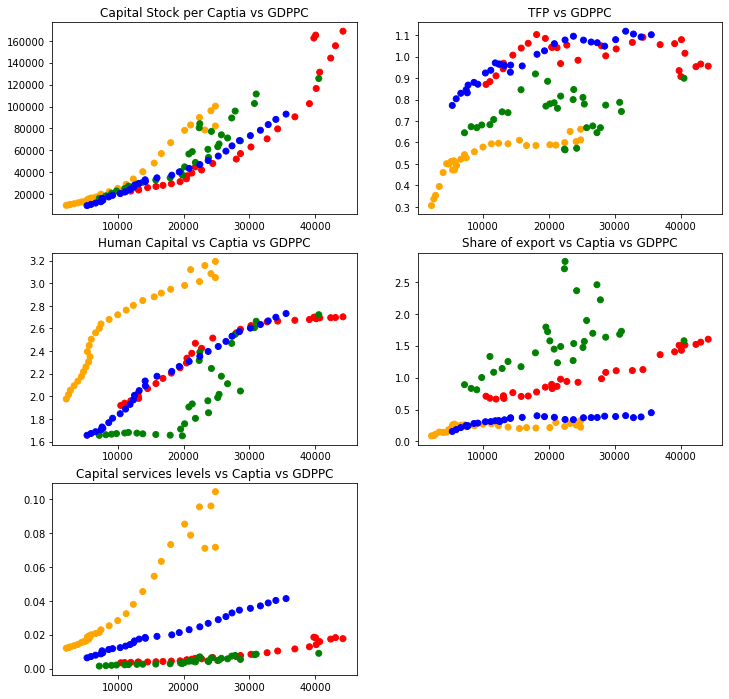

In [124]:
country = df
fig, axs = plt.subplots(3, 2, figsize = (12, 12))
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs Captia vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs Captia vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs Captia vs GDPPC")
axs[2][1].set_visible(False)

The scatter plots gives a glance of the independent variables. Human capital and capital stock show clear correlations with GDPPC, but TFP and share of export doesn't. 

In order to find the similarity and difference between the Four Tigers, we split the data by countries and build indiviual model for each of them. 

### Hong Kong

Hong Kong features in open trade policy and financial services.

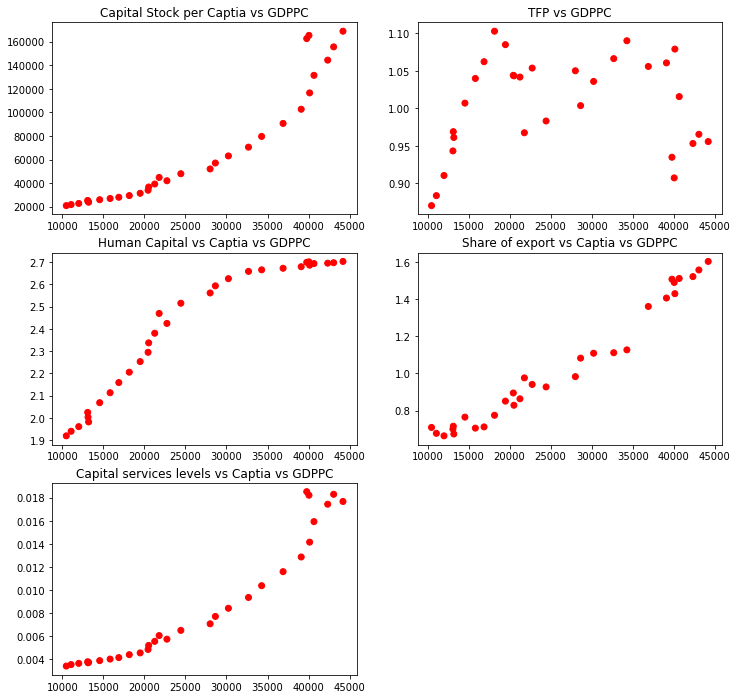

In [126]:
country = hkg
fig, axs = plt.subplots(3, 2, figsize = (12, 12))
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs Captia vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs Captia vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs Captia vs GDPPC")
axs[2][1].set_visible(False)

In [125]:
lrm = smf.ols(formula='gdppc ~ cnpc+csh_x+hc:ctfp',data=hkg).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1388.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.13e-29
Time:                        02:54:08   Log-Likelihood:                -254.54
No. Observations:                  31   AIC:                             517.1
Df Residuals:                      27   BIC:                             522.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.859e+04   1413.533    -13.155      0.0

In [95]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

  feature         VIF
0   const  297.244401
1    cnpc  171.612034
2      hc    9.160836
3   csh_x   46.076948
4      ck  223.659510
5    ctfp    1.960692


### Taiwan

Taiwan features technology import and high-tech manufacturing

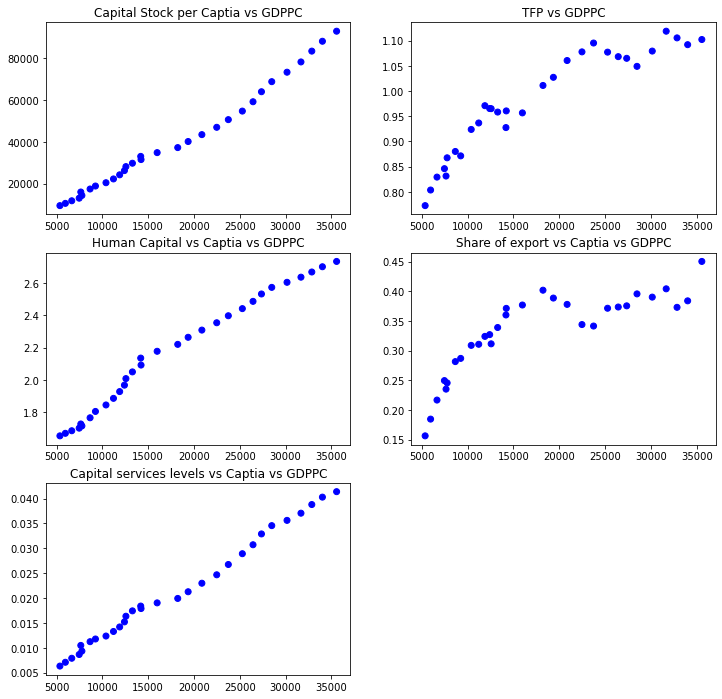

In [136]:
country = twn
fig, axs = plt.subplots(3, 2, figsize = (12, 12))
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs Captia vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs Captia vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs Captia vs GDPPC")
axs[2][1].set_visible(False)

In [140]:
lrm = smf.ols(formula='gdppc ~ cnpc:ck+csh_x+hc+ctfp',data=twn).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2783.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           8.35e-34
Time:                        03:12:17   Log-Likelihood:                -233.30
No. Observations:                  31   AIC:                             476.6
Df Residuals:                      26   BIC:                             483.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.968e+04   1639.634    -18.103      0.0

### Singapore

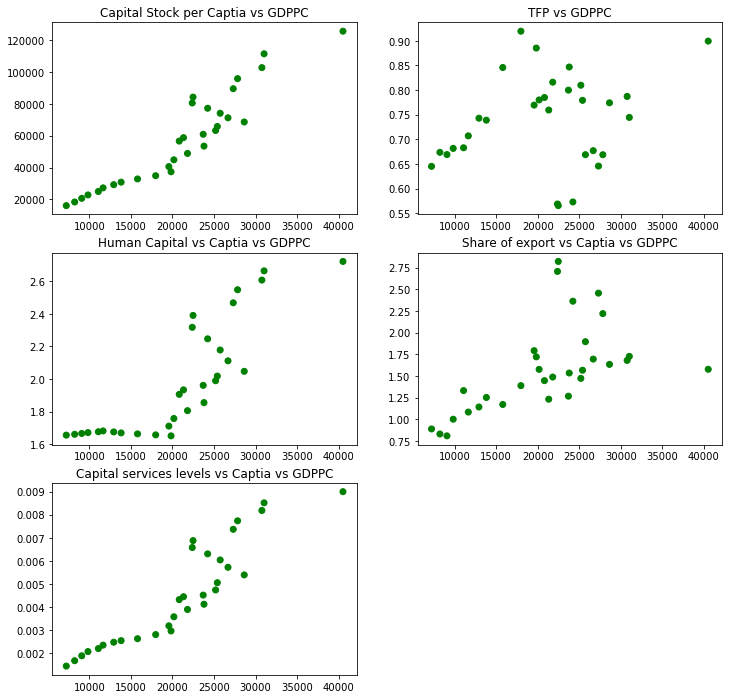

In [141]:
country = sgp
fig, axs = plt.subplots(3, 2, figsize = (12, 12))
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs Captia vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs Captia vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs Captia vs GDPPC")
axs[2][1].set_visible(False)

In [148]:
lrm = smf.ols(formula='gdppc ~ cnpc+hc+ctfp',data=sgp).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     403.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.59e-22
Time:                        03:22:35   Log-Likelihood:                -261.86
No. Observations:                  31   AIC:                             531.7
Df Residuals:                      27   BIC:                             537.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.336e+04   7492.496      4.452      0.0

### South Korea
south korea features in heavy industry

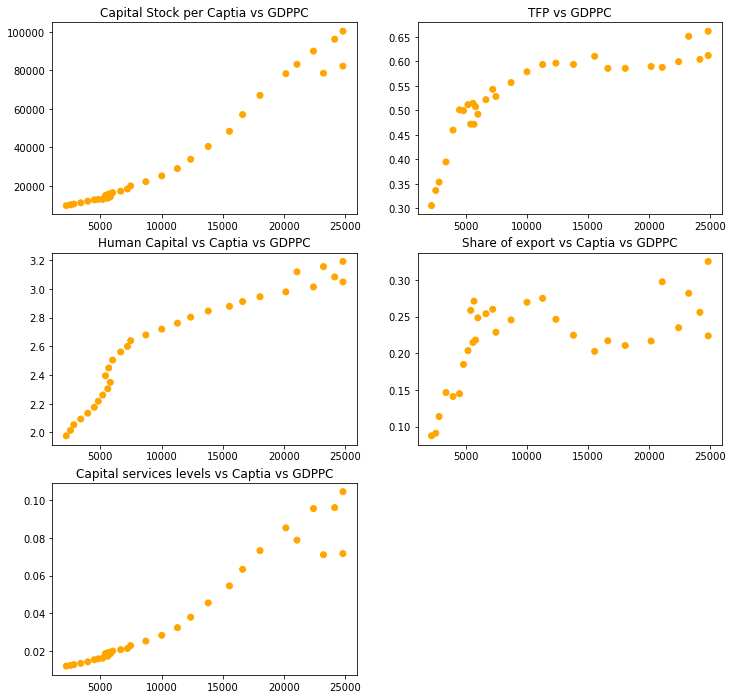

In [150]:
country = kor
fig, axs = plt.subplots(3, 2, figsize = (12, 12))
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs Captia vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs Captia vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs Captia vs GDPPC")
axs[2][1].set_visible(False)

In [78]:
lrm = smf.ols(formula='gdppc ~ cnpc+hc+ctfp+ck+',data=kor).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                rgdpogr   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     11.93
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           8.96e-05
Time:                        04:15:56   Log-Likelihood:                 51.377
No. Observations:                  25   AIC:                            -94.75
Df Residuals:                      21   BIC:                            -89.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0248      0.025      0.988      0.3